In [1]:
from datetime import datetime
import backtrader as bt
import yfinance as yf
import pandas as pd
from get_histdata import GetHistData_yf
import backtrader.indicators as btind

In [2]:
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)


In [2]:
class MA_CrossOver(bt.Strategy):
    '''This is a long-only strategy which operates on a moving average cross
    Note:
      - Although the default
    Buy Logic:
      - No position is open on the data
      - The ``fast`` moving averagecrosses over the ``slow`` strategy to the
        upside.
    Sell Logic:
      - A position exists on the data
      - The ``fast`` moving average crosses over the ``slow`` strategy to the
        downside
    Order Execution Type:
      - Market
    '''
    alias = ('SMA_CrossOver',)

    params = (
        # period for the fast Moving Average
        ('fast', 10),
        # period for the slow moving average
        ('slow', 30),
        # moving average to use
        ('_movav', btind.MovAv.SMA)
    )

    def __init__(self):
        sma_fast = self.p._movav(period=self.p.fast)
        sma_slow = self.p._movav(period=self.p.slow)

        self.buysig = btind.CrossOver(sma_fast, sma_slow)

    def next(self):
        if self.position.size:
            if self.buysig < 0:
                self.sell()

        elif self.buysig > 0:
            self.buy()

In [8]:
data=pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]
tickers=data['Symbol'].to_list()
tickers=["{}.NS".format(tick) for tick in tickers]
tickers.append('^NSEI')
# tickers

In [9]:
dataframe=GetHistData_yf(['^NSEI'],'2018-01-01')


Getting historical using yfinance
Fetching data from 2018-01-01 00:00:00 to 2022-06-13 00:00:00
--- 1.1264348030090332 seconds ---


In [10]:
dataframe.to_csv('NIFTY_50_2018-01-01.csv')

<IPython.core.display.Javascript object>


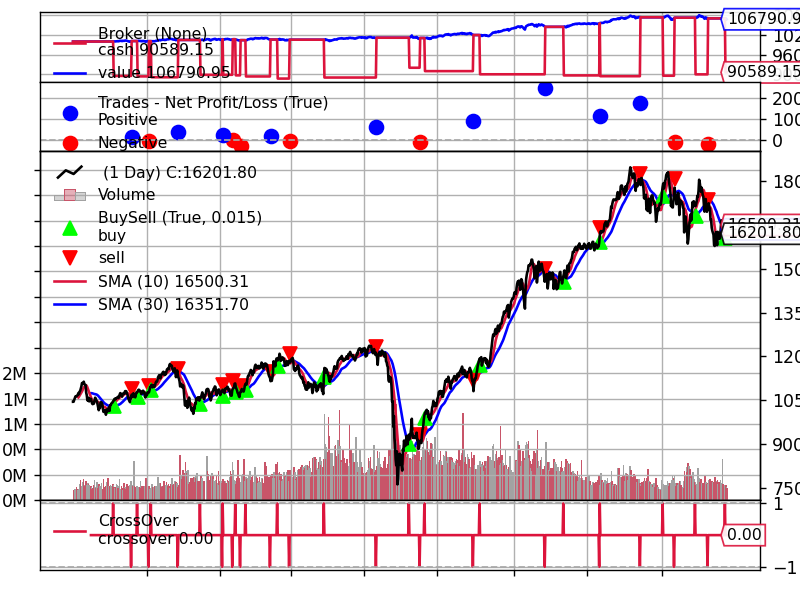

[[<Figure size 640x480 with 5 Axes>]]

In [11]:
cerebro = bt.Cerebro()
cerebro.broker.set_cash(100000)

# Pass it to the backtrader datafeed and add it to the cerebro
data = bt.feeds.PandasData(dataname=dataframe)

cerebro.adddata(data)
cerebro.addstrategy(MA_CrossOver)
# Run over everything
cerebro.run()

# Plot the result
cerebro.plot()